In [1]:
!pip install chart-studio

In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
#print(os.listdir("../input"))

In [2]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [3]:

from matplotlib import rcParams

plt.style.use("ggplot")
rcParams["figure.figsize"] = [12, 9]
rcParams["xtick.labelsize"] = 15
rcParams["ytick.labelsize"] = 15
rcParams["font.size"] = 15

warnings.filterwarnings("ignore")

In [5]:
#https://stackoverflow.com/questions/60017052/decompose-for-time-series-valueerror-you-must-specify-a-period-or-x-must-be
#https://github.com/abhigyan631/Exploratory-Data-Analysis-Projects/blob/main/Tetuan%20city%20power%20consumption/Tetuan%20city%20power%20consumption%20prediction%20using%20Machine%20Learning.ipynb
#https://archive.ics.uci.edu/dataset/360/air+quality

In [4]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [5]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [6]:
df['DateTime'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [8]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  DateTime       9357 n

In [10]:
#transforming DateTime column into index
df = df.set_index('DateTime')

In [11]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


# Feature Creation

In [14]:
def create_features(data):
    """
    Create time series features like hour, month, year, day, etc. based on time series index.
    """
    data = data.copy()
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    data['dayofmonth'] = data.index.day
    data['weekofyear'] = data.index.isocalendar().week
    return data

df = create_features(df)

In [25]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),...,RH,AH,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
DateTime,,,,,,,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,...,48.875001,0.757754,18,2,1,3,2004,70,10,11
2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,...,47.700000,0.725487,19,2,1,3,2004,70,10,11
2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,...,53.975000,0.750239,20,2,1,3,2004,70,10,11
2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,...,60.000000,0.786713,21,2,1,3,2004,70,10,11
2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,...,59.575001,0.788794,22,2,1,3,2004,70,10,11


# AD Fuller test

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df["NO2(GT)"])

# Extract the p-value from the test result
p_value = result[1]

# Check if the series is stationary based on the p-value
if p_value < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


The time series is stationary.


# Trend, Seasonality and Noise

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
# assuming 'df' is your DataFrame and 'time_series_column' is the column with the time series data
decomposed = seasonal_decompose(df['NO2(GT)'],model='additive', extrapolate_trend='freq', period=1) 
#https://analyticsindiamag.com/why-decompose-a-time-series-and-how/

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid



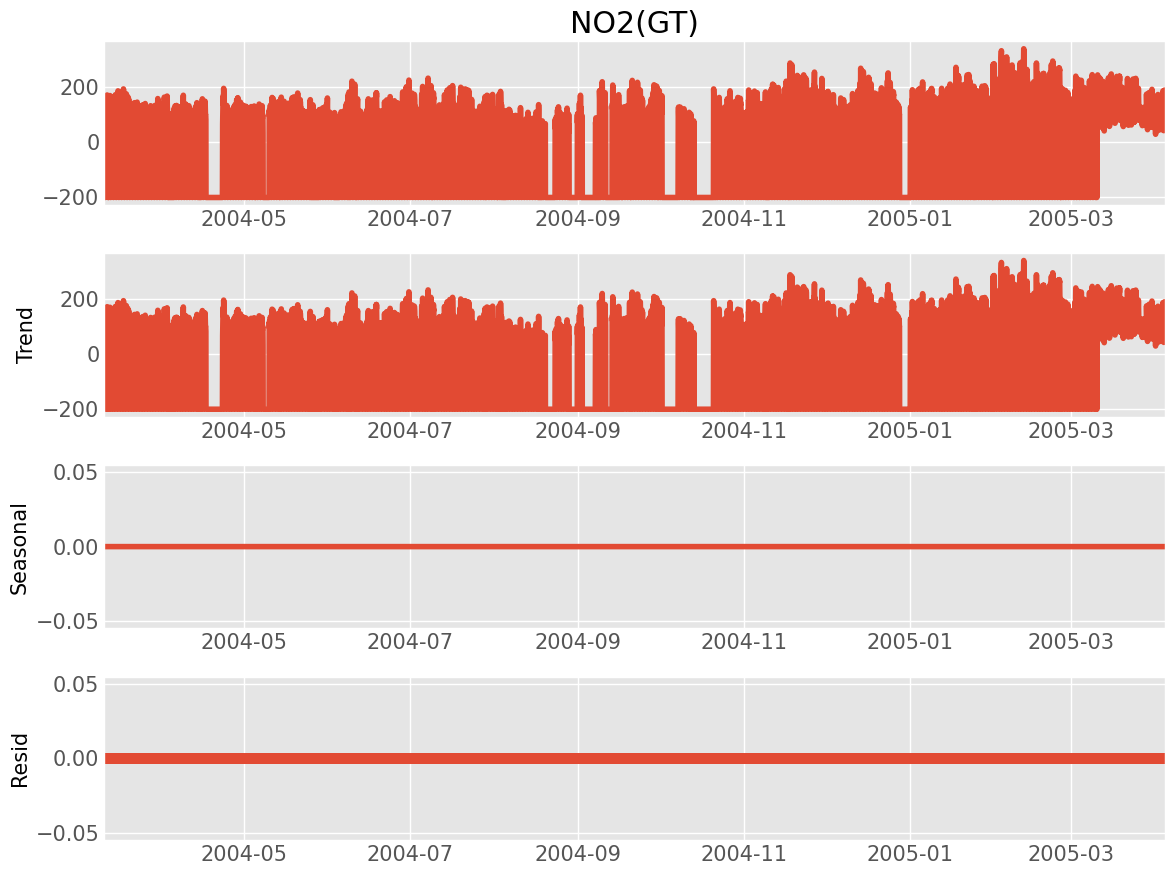

In [14]:
decomposed.plot()
plt.show()

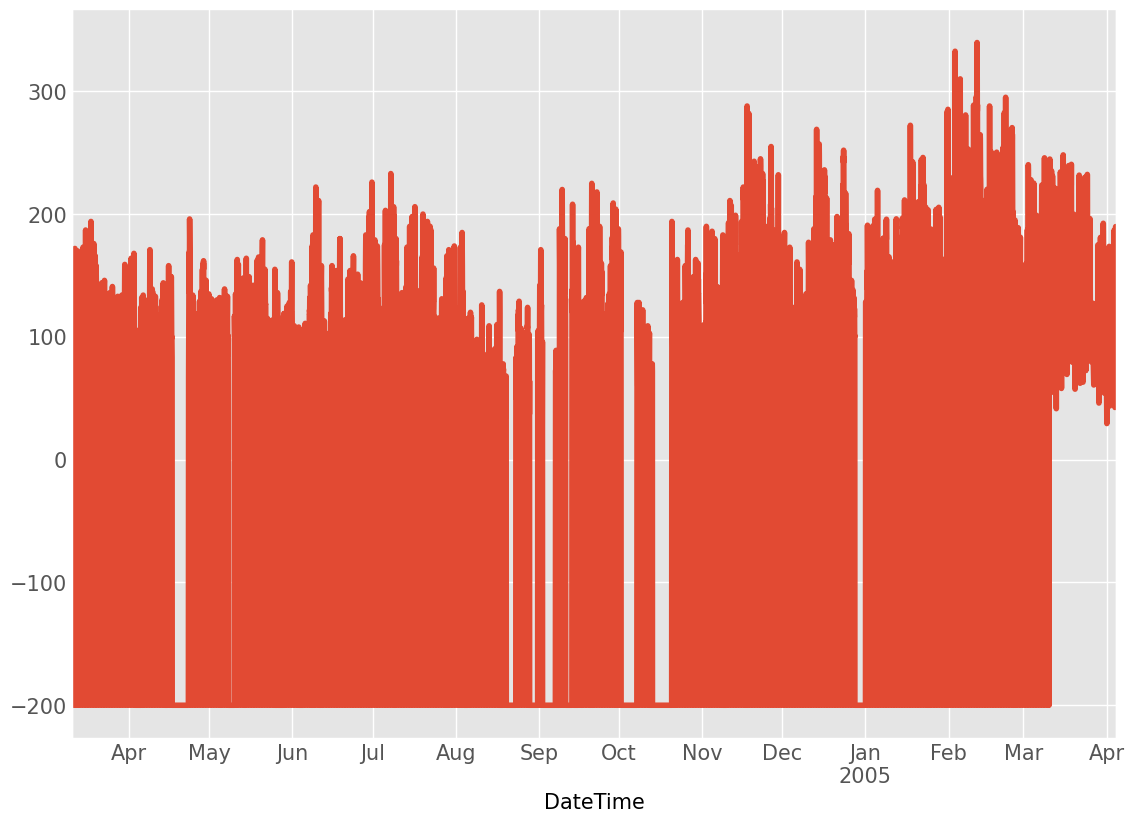

In [15]:
level = decomposed.observed
level.plot();

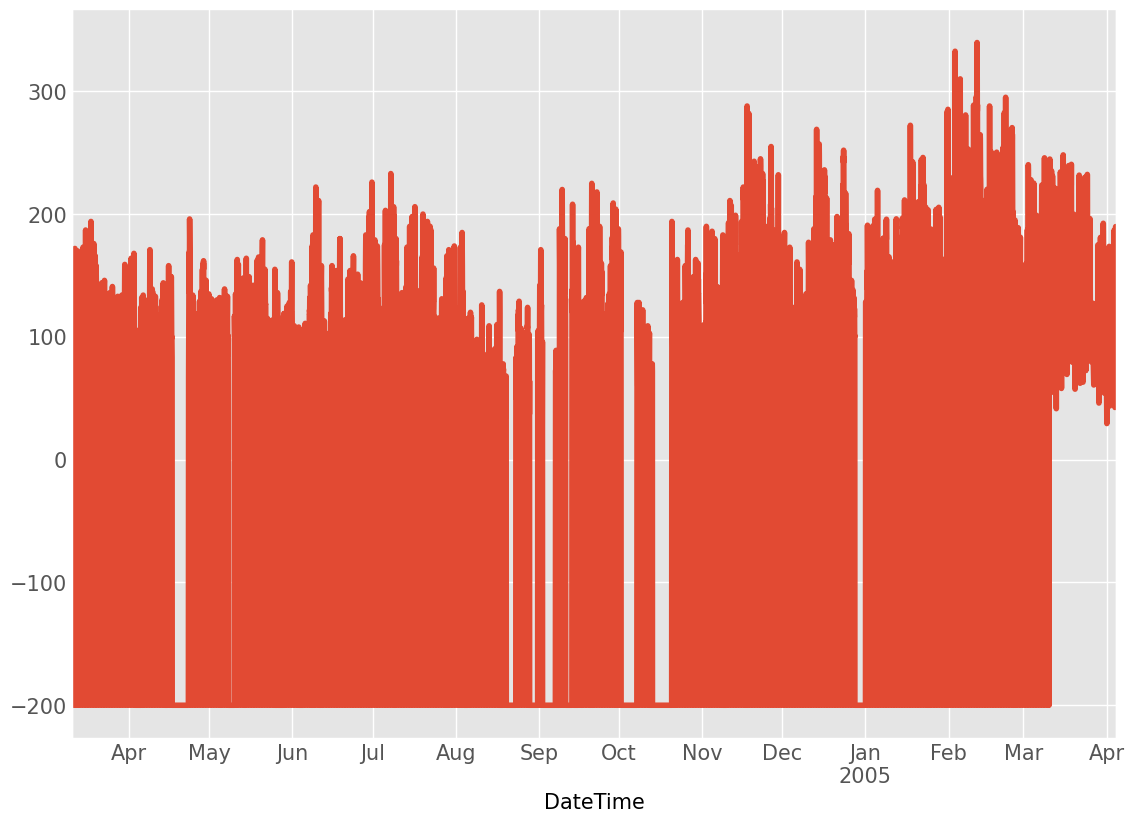

In [16]:
trend=decomposed.trend
trend.plot();


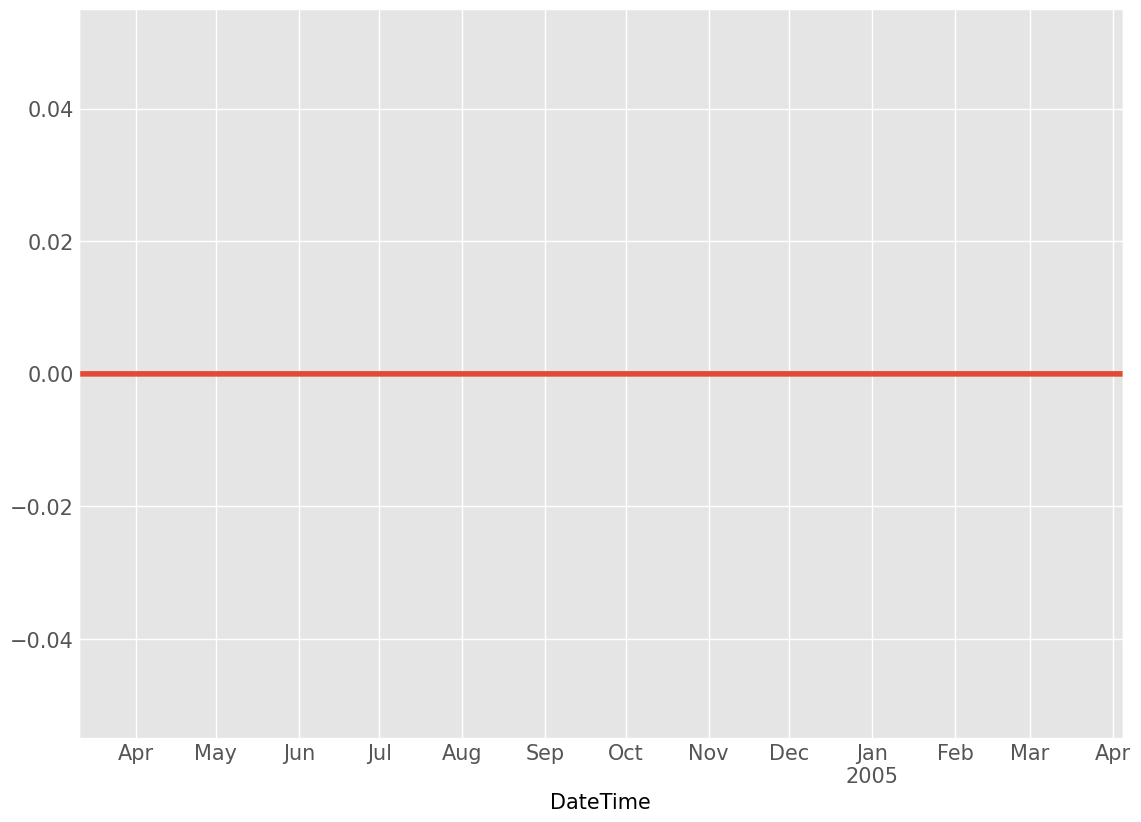

In [17]:
seasonality = decomposed.seasonal
seasonality.plot();


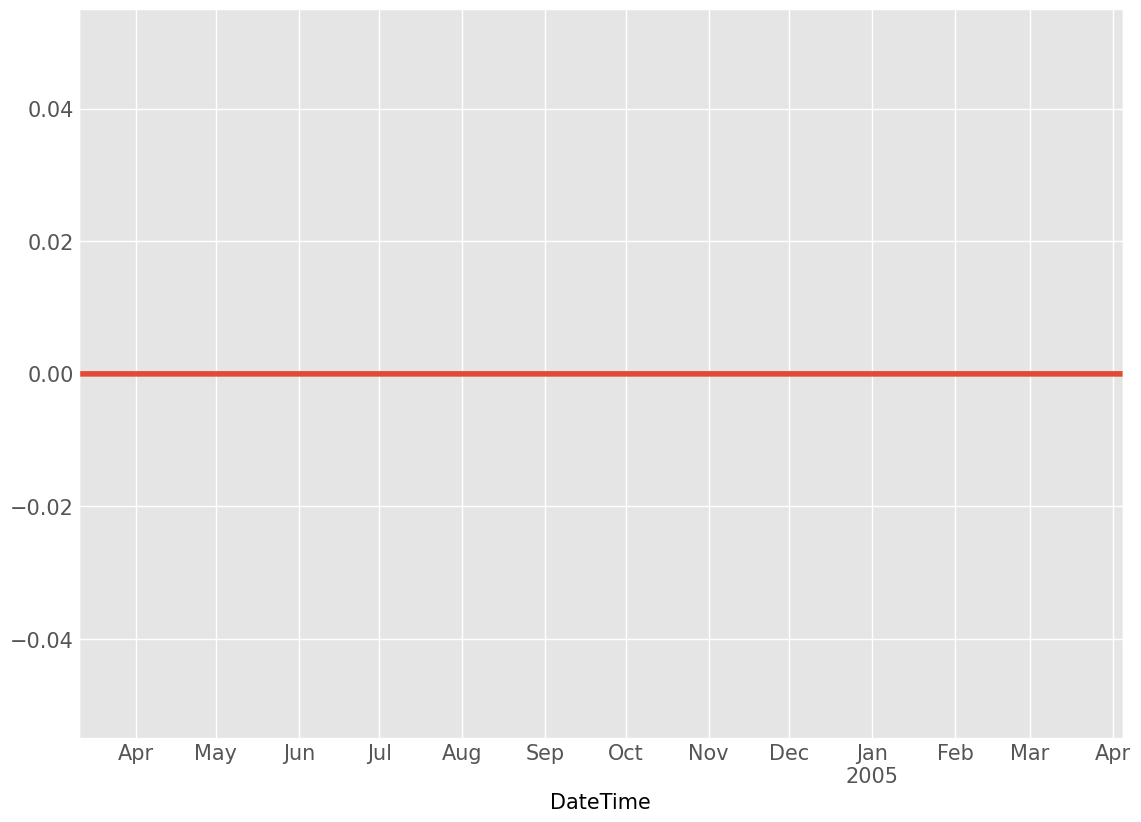

In [18]:
residual = decomposed.resid
residual.plot();


In [19]:
component = pd.concat([level, trend, seasonality, residual],axis=1)
component.head(10)


,NO2(GT),trend,seasonal,resid
DateTime,,,,
2004-03-10 18:00:00,113.0,113.0,0.0,0.0
2004-03-10 19:00:00,92.0,92.0,0.0,0.0
2004-03-10 20:00:00,114.0,114.0,0.0,0.0
2004-03-10 21:00:00,122.0,122.0,0.0,0.0
2004-03-10 22:00:00,116.0,116.0,0.0,0.0
2004-03-10 23:00:00,96.0,96.0,0.0,0.0
2004-03-11 00:00:00,77.0,77.0,0.0,0.0
2004-03-11 01:00:00,76.0,76.0,0.0,0.0
2004-03-11 02:00:00,60.0,60.0,0.0,0.0


# Autocorrelation and Partial Autocorrelation

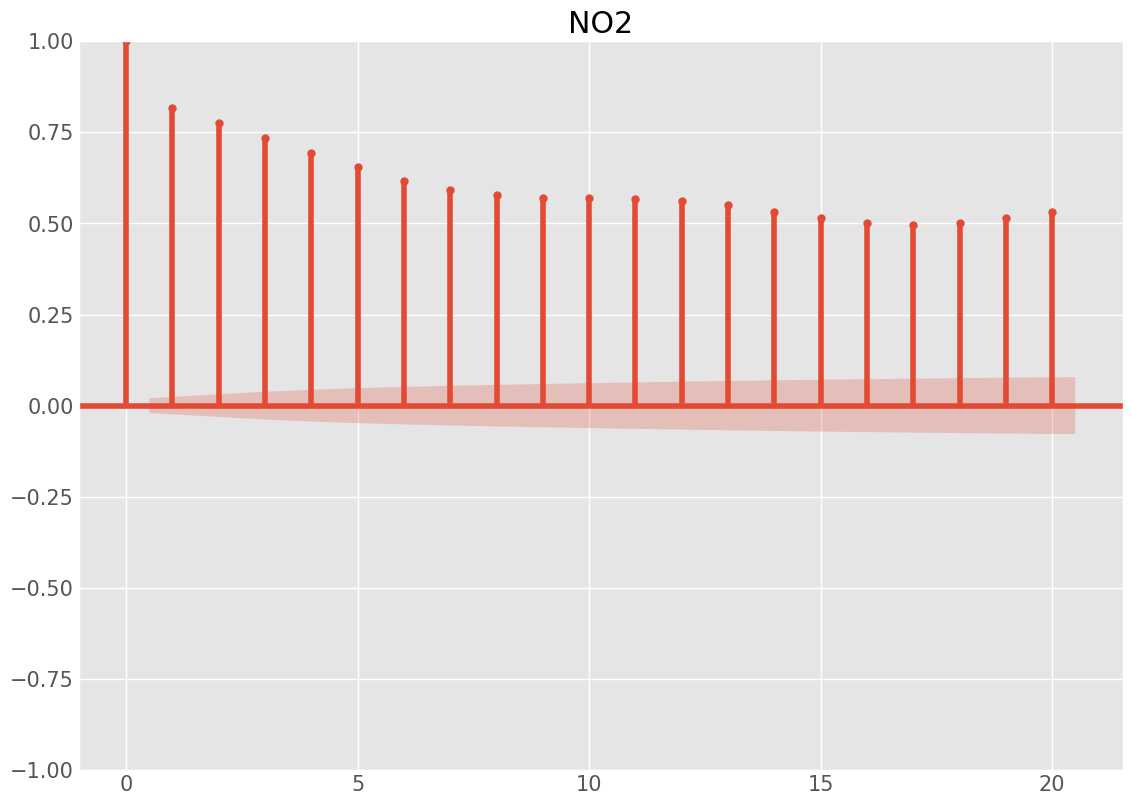

In [20]:
# Autocorrelation of NO2 level
plot_acf(df["NO2(GT)"],lags=20,title="NO2")
plt.show()


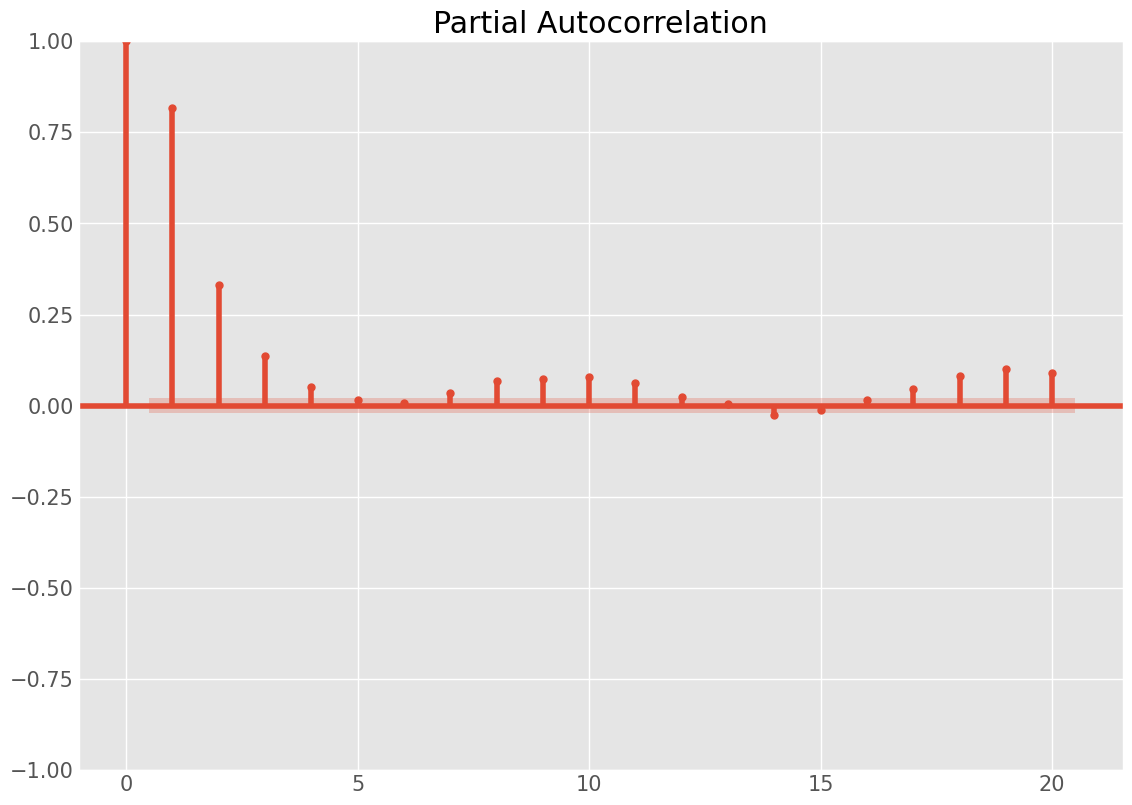

In [21]:
# Partial Autocorrelation of NO2 level
plot_pacf(df["NO2(GT)"],lags=20)
plt.show()


# White Noise

White noise is a type of random signal that has equal intensity at all frequencies. It is often used in signal processing and time series analysis as a reference or baseline signal. In Python, you can generate and visualize white noise using various libraries such as NumPy and Matplotlib.

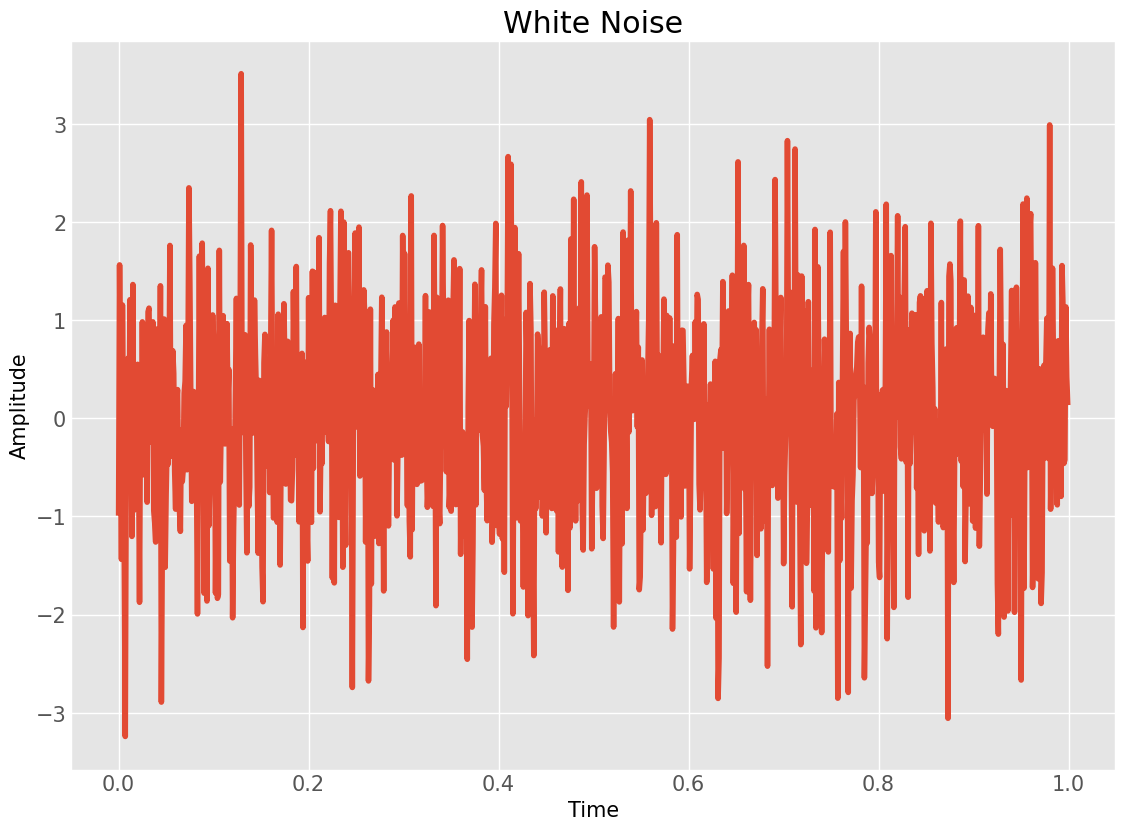

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sample rate and the duration
sample_rate = 1000
duration = 1.0

# Generate a time array
t = np.arange(int(sample_rate * duration)) / sample_rate

# Generate white noise
noise = np.random.normal(0, 1, len(t))

# Plot the white noise
plt.plot(t, noise)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('White Noise')
plt.show()


# Data Visualization

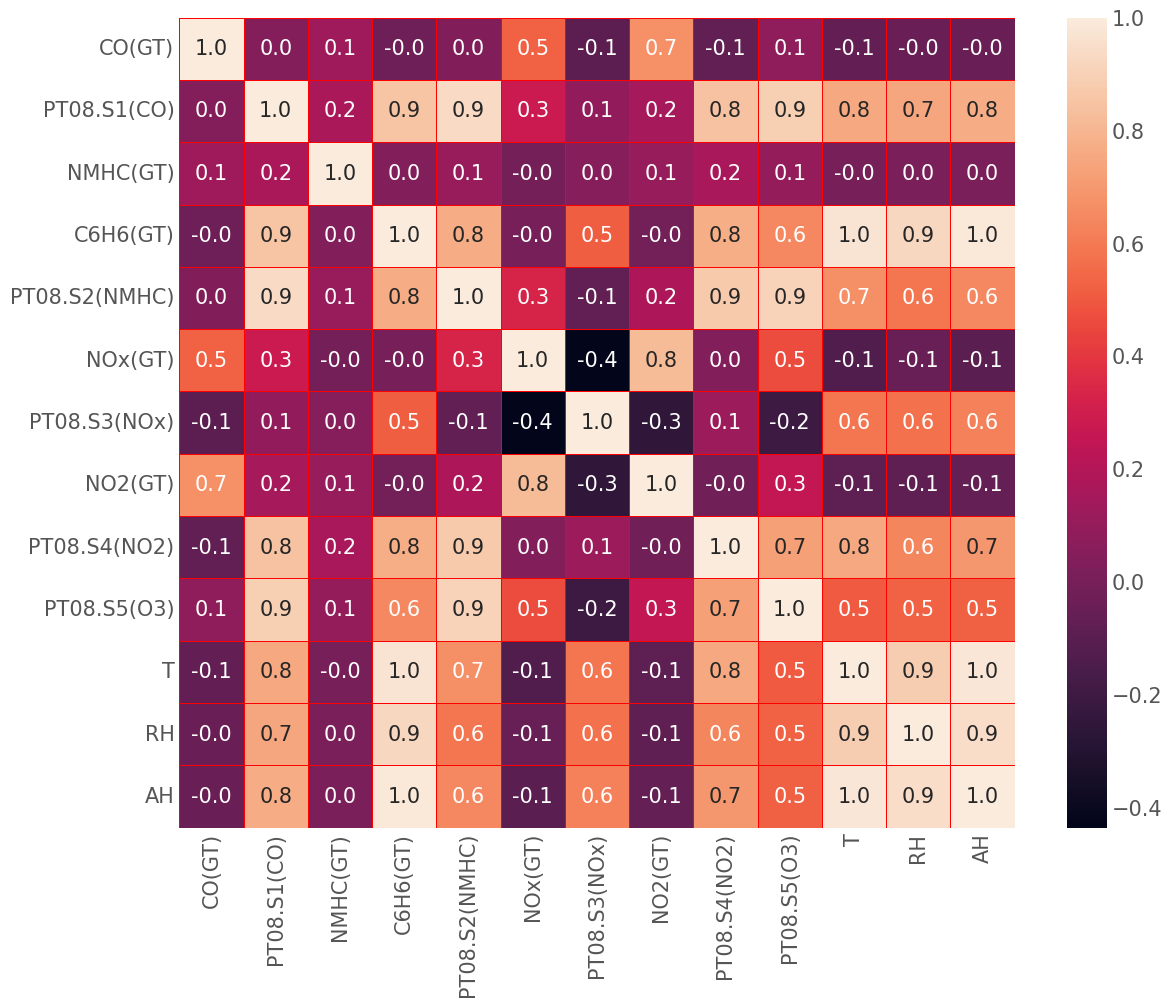

In [24]:
f, ax = plt.subplots(figsize = (12,10))

sns.heatmap(df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']].corr(),
            annot = True,
            linecolor = 'r',
            linewidths = .5,
            fmt = '.1f',
            ax = ax);

# Time Series Forecasting

Simple moving average

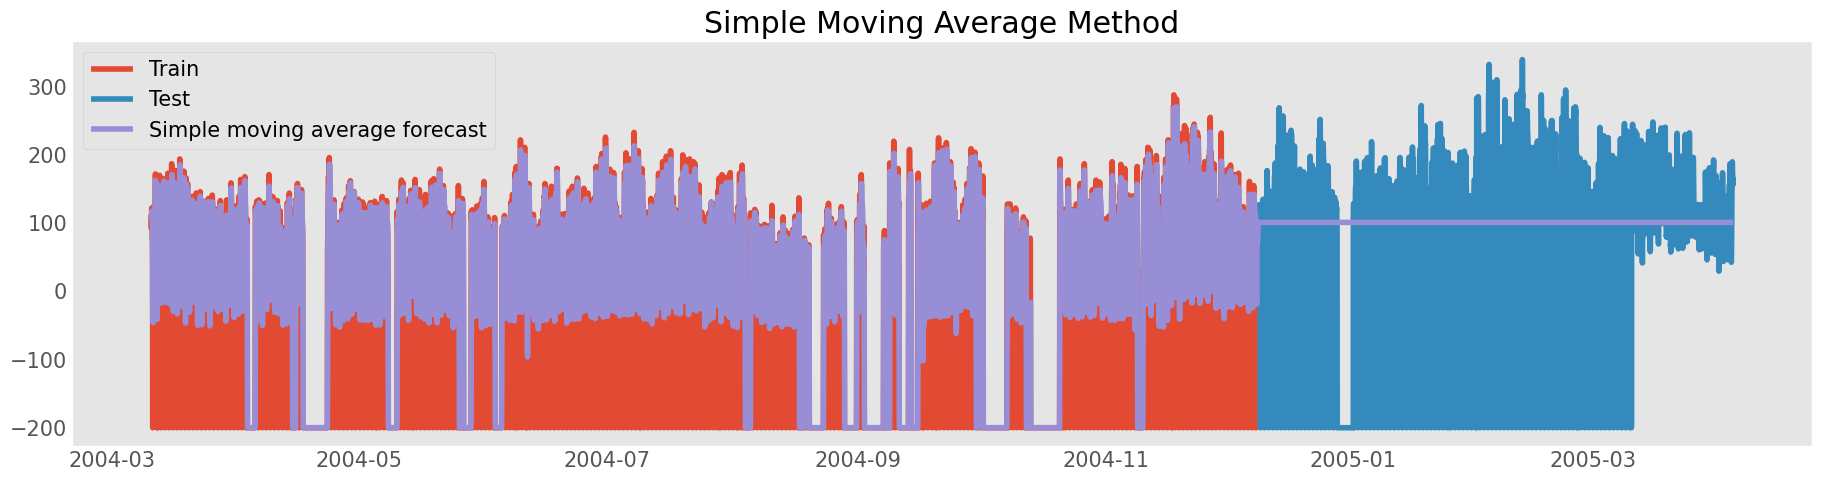

In [25]:
train_size = int(len(df) * 0.7)
train_set, test_set = df[:train_size], df[train_size:]

#Simple Moving Average
#https://www.kaggle.com/code/gauravduttakiit/timeseries-forecasting-with-simple-moving-average

y_observed_sma = df["NO2(GT)"].copy()
ma_window = 3
y_observed_sma['sma_forecast'] = df["NO2(GT)"].rolling(ma_window).mean()
y_observed_sma['sma_forecast'][train_size:] = y_observed_sma['sma_forecast'][train_size-1]
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_set['NO2(GT)'], label='Train')
plt.plot(test_set['NO2(GT)'], label='Test')
plt.plot(y_observed_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()


Exponential Smoothing

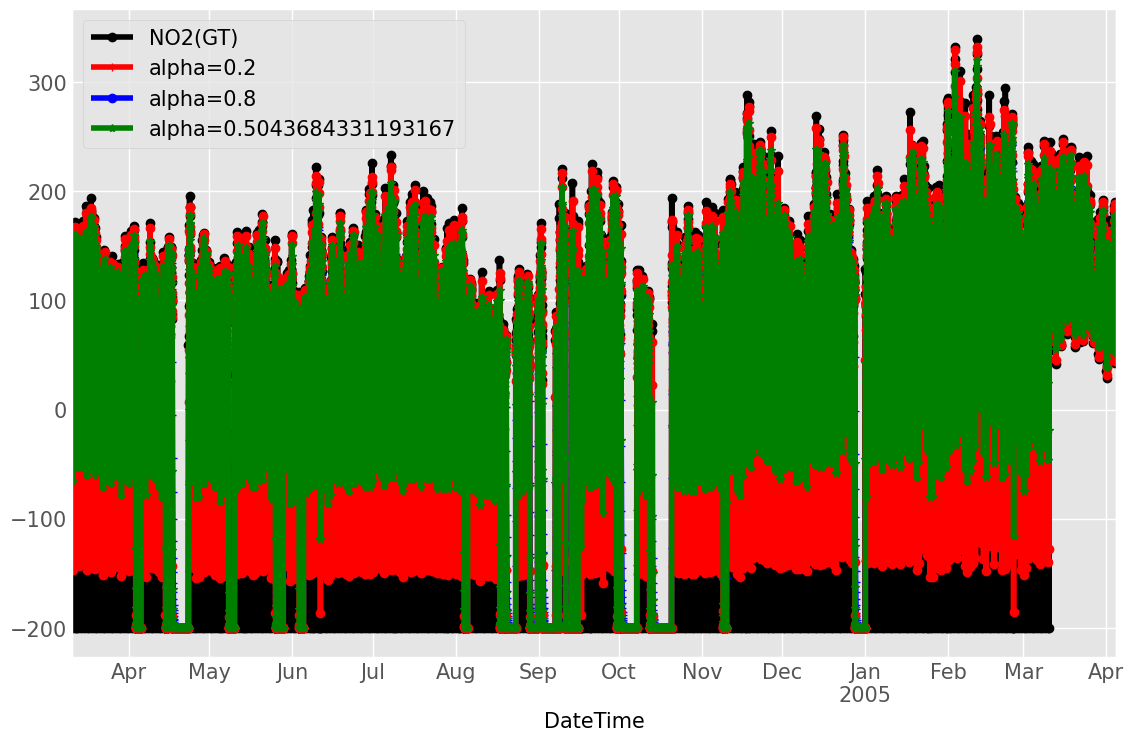

In [26]:
from statsmodels.tsa.api import SimpleExpSmoothing
#https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/

#First Model
model1 = SimpleExpSmoothing(df['NO2(GT)']).fit(smoothing_level=0.2,optimized=False)
model_fit1 = model1.forecast(3).rename('alpha=0.2')


#Second Model
model2 = SimpleExpSmoothing(df['NO2(GT)']).fit(smoothing_level=0.8,optimized=False)
model_fit2 = model2.forecast(3).rename('alpha=0.8')


#Third Model
model3 = SimpleExpSmoothing(df['NO2(GT)']).fit()
model_fit3 = model3.forecast(3).rename('alpha=%s'%model3.model.params['smoothing_level'])


#After creating the models we visualize the plots
ax = df['NO2(GT)'].plot(marker='o', color='black', figsize=(12,8), legend=True)


#Plot for alpha =0.2
model_fit1.plot(marker='+', ax=ax, color='red', legend=True)
model1.fittedvalues.plot(marker='+', ax=ax, color='blue')


#Plot for alpha = 0.8
model_fit2.plot(marker='o', ax=ax, color='blue', legend=True)
model2.fittedvalues.plot(marker='o', ax=ax, color='red')


#Plot for alpha=Optimized by the statsmodel
model_fit3.plot(marker='*', ax=ax, color='green', legend=True)
model3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.show()


Autoregressive (AR)

In [27]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the AR model (let's assume we're fitting an AR(1) model)
model = ARIMA(df['NO2(GT)'], order=(1, 0, 0))
model_fit = model.fit()
# Make a forecast
forecast = model_fit.forecast(steps=5)
print('Forecast: ', forecast)


Forecast:  2005-04-04 15:00:00    147.587421
2005-04-04 16:00:00    131.166890
2005-04-04 17:00:00    117.760660
2005-04-04 18:00:00    106.815399
2005-04-04 19:00:00     97.879349
Freq: H, Name: predicted_mean, dtype: float64


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                NO2(GT)   No. Observations:                 9357
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -53459.778
Date:                Thu, 11 Jan 2024   AIC                         106925.555
Time:                        10:38:34   BIC                         106946.987
Sample:                    03-10-2004   HQIC                        106932.834
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1359      8.426      6.900      0.000      41.622      74.650
ar.L1          0.8164      0.011     73.742      0.000       0.795       0.838
sigma2      5371.0784     77.770     69.063      0.000    5218.651    5523.506
===================================================================================
Ljung-Box (L1) (Q):                 680.10   Jarque-Bera (JB):             29184.65
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA

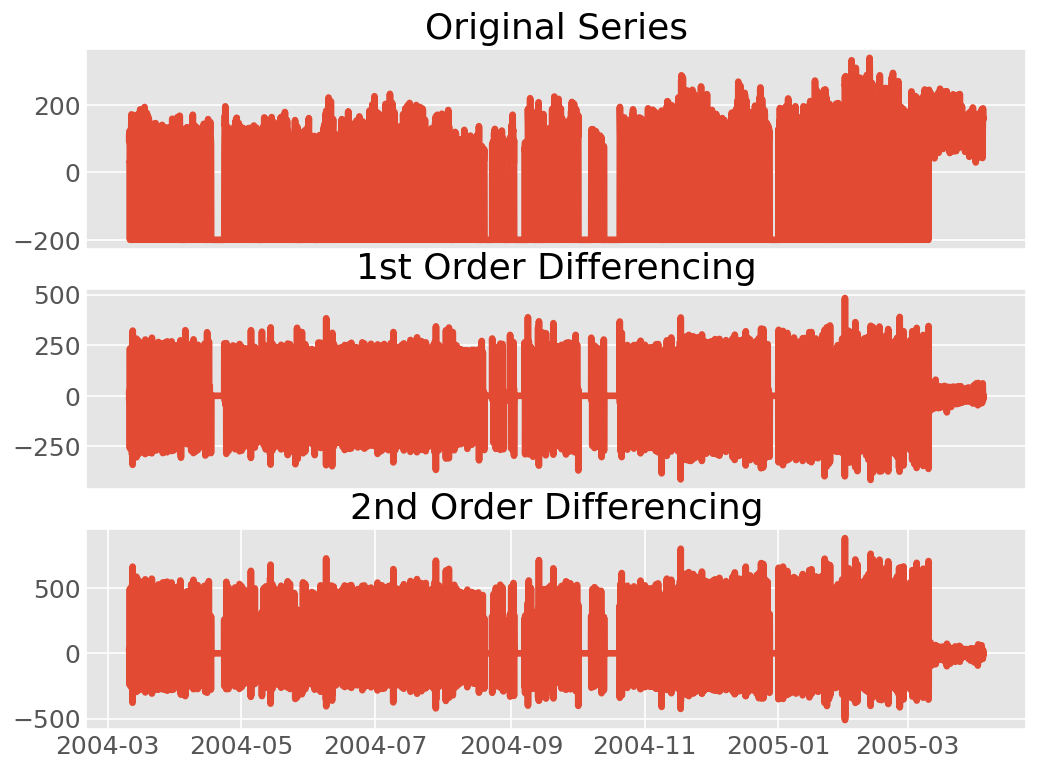

In [29]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
#https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df['NO2(GT)']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df['NO2(GT)'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df['NO2(GT)'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()


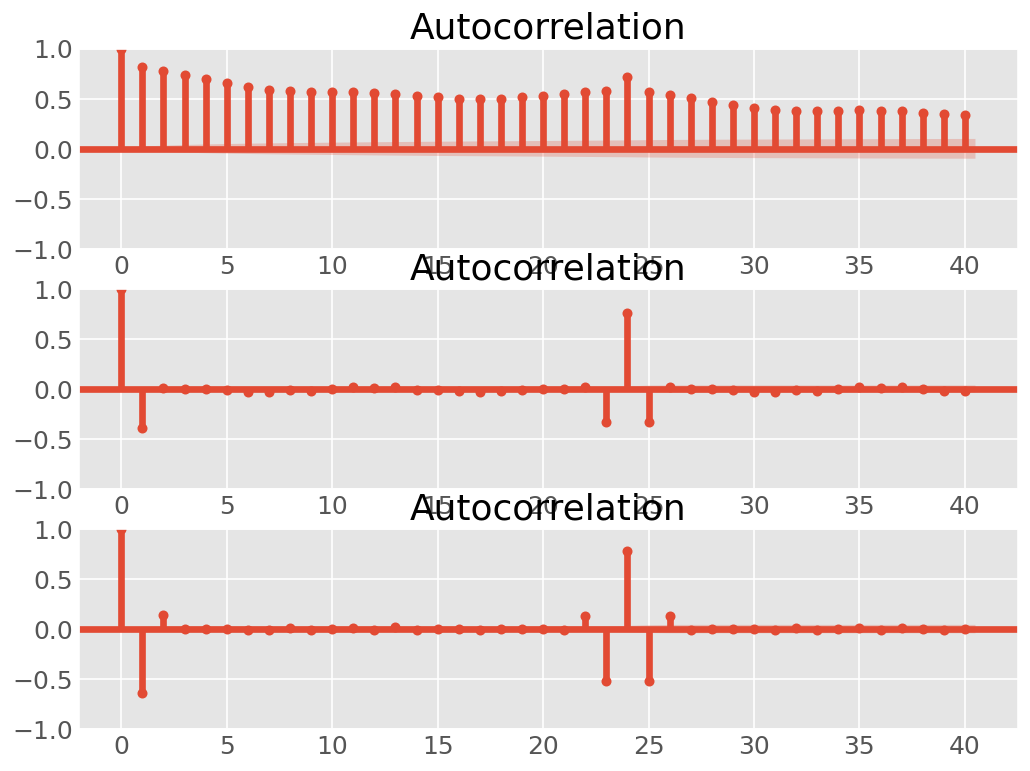

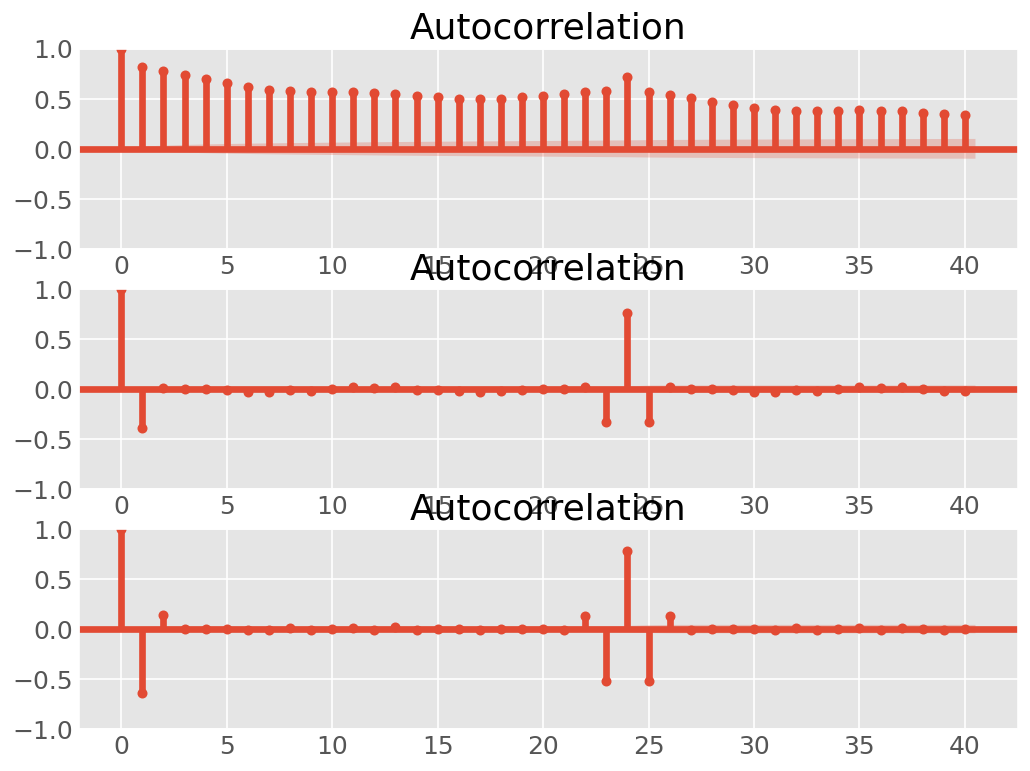

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(df['NO2(GT)'], ax=ax1)
plot_acf(df['NO2(GT)'].diff().dropna(), ax=ax2)
plot_acf(df['NO2(GT)'].diff().diff().dropna(), ax=ax3)


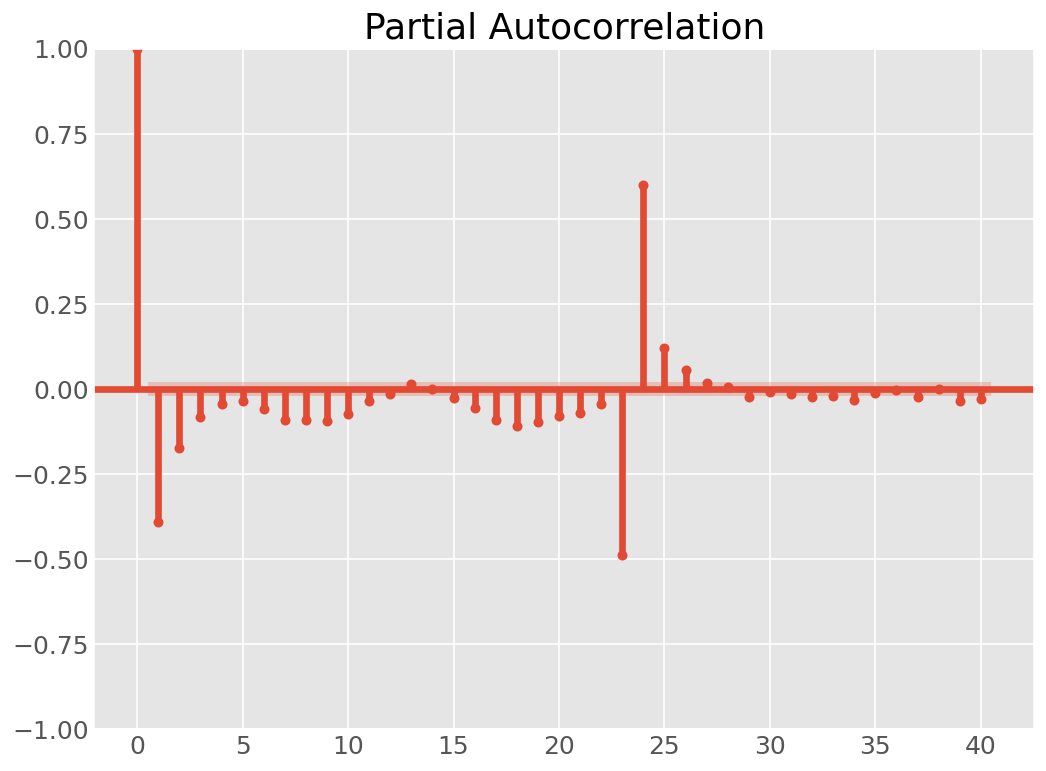

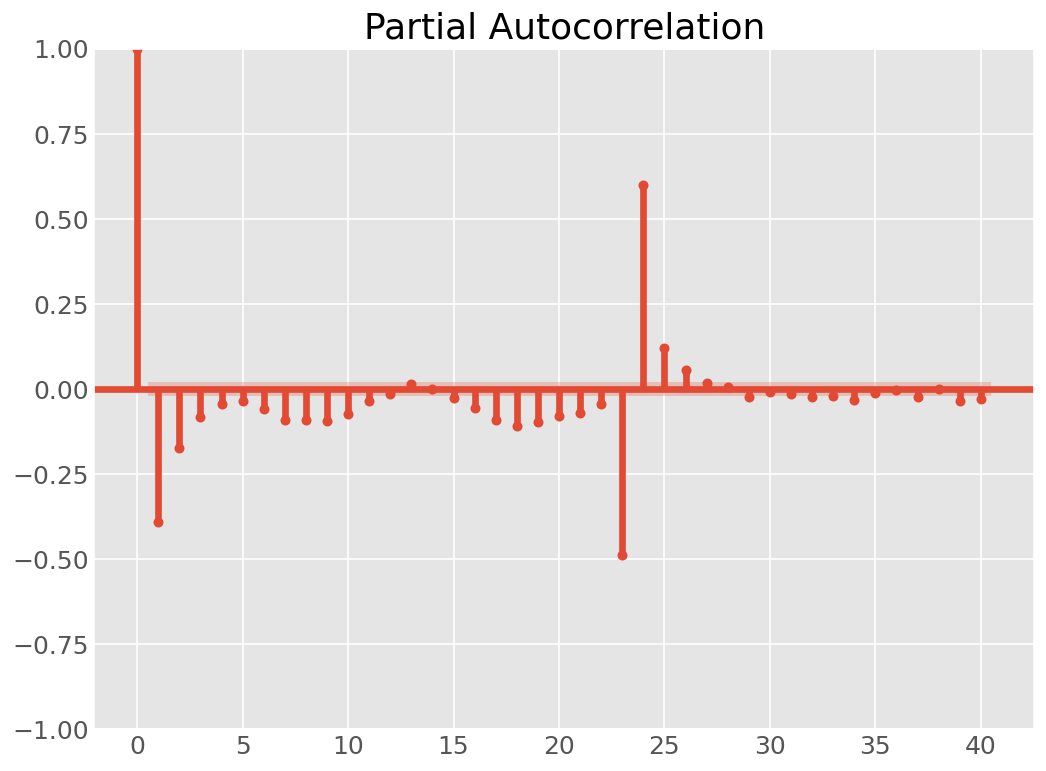

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['NO2(GT)'].diff().dropna())


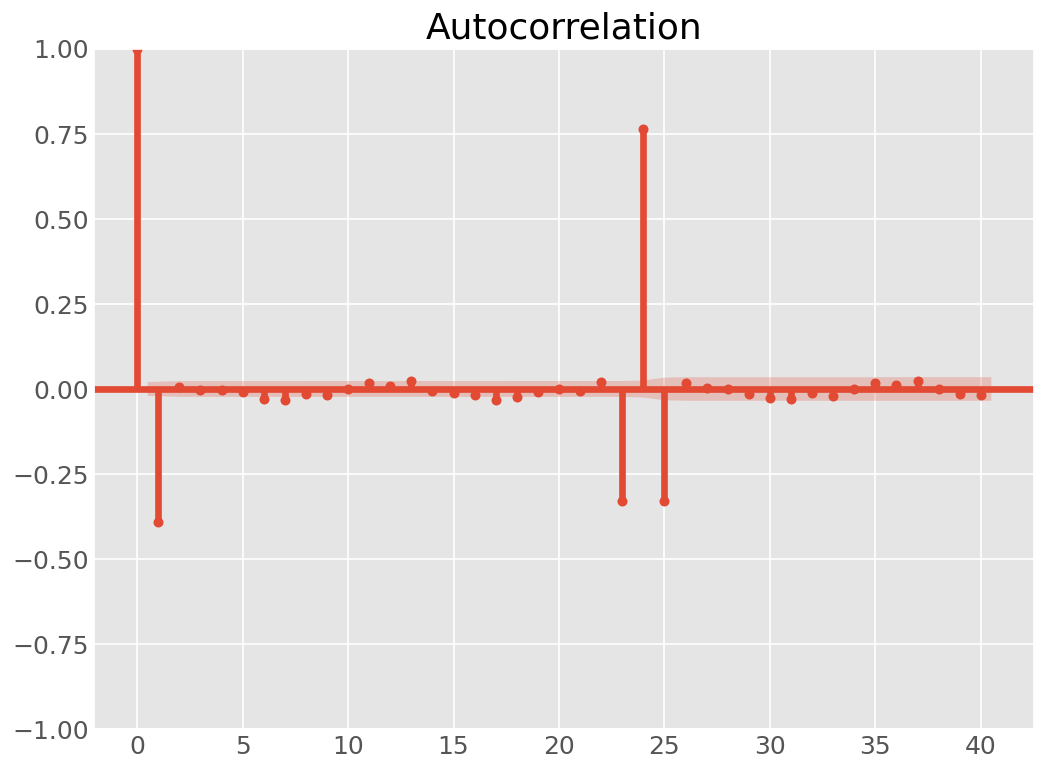

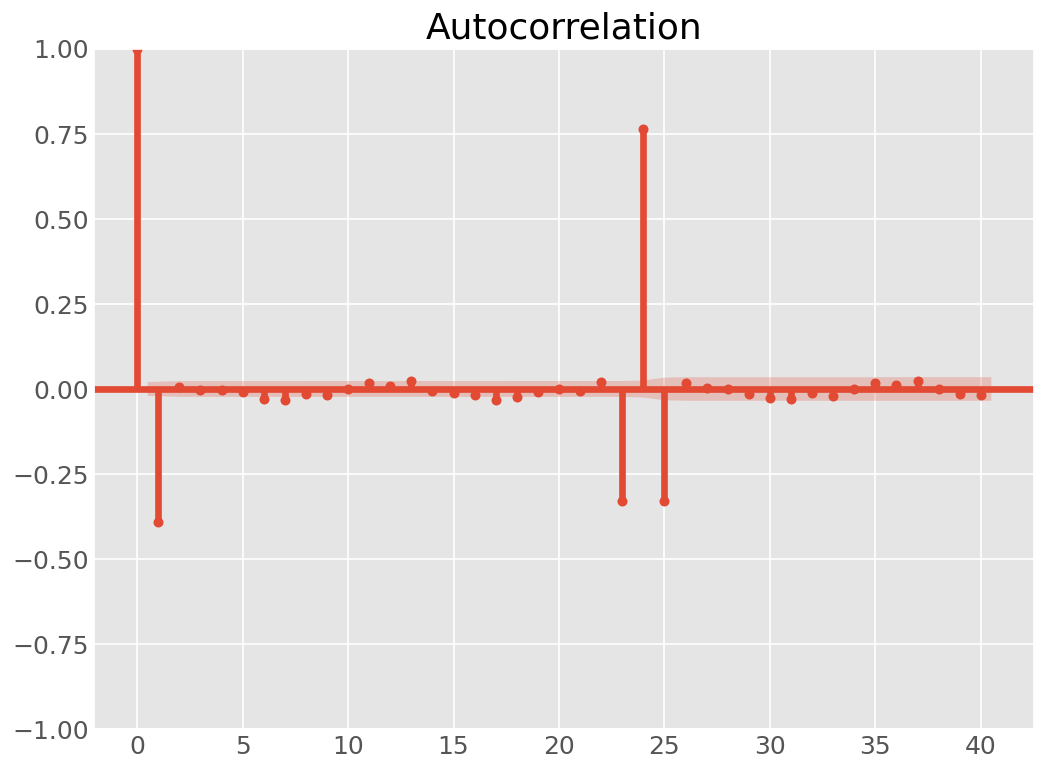

In [32]:
plot_acf(df['NO2(GT)'].diff().dropna())

In [33]:
# Fit the AR model (let's assume we're fitting an AR(1) model)
model = ARIMA(df['NO2(GT)'], order=(1, 1, 2))
model_fit = model.fit()
# Make a forecast
forecast = model_fit.forecast(steps=5)
print('Forecast: ', forecast)


Forecast:  2005-04-04 15:00:00    156.726436
2005-04-04 16:00:00    152.392722
2005-04-04 17:00:00    148.767476
2005-04-04 18:00:00    145.734879
2005-04-04 19:00:00    143.198047
Freq: H, Name: predicted_mean, dtype: float64


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                NO2(GT)   No. Observations:                 9357
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -52756.665
Date:                Thu, 11 Jan 2024   AIC                         105521.329
Time:                        10:41:12   BIC                         105549.905
Sample:                    03-10-2004   HQIC                        105531.034
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8365      0.015     54.101      0.000       0.806       0.867
ma.L1         -1.3401      0.018    -73.473      0.000      -1.376      -1.304
ma.L2          0.3652      0.015     24.210      0.000       0.336       0.395
sigma2      4626.8501     29.347    157.661      0.000    4569.331    4684.369
===================================================================================
Ljung-Box (L1) (Q):                   2.44   Jarque-Bera (JB):             57442.16
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -2.37
Prob(H) (two-sided):                  0.01   Kurtosis:                        14.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Fit the AR model (let's assume we're fitting an AR(1) model)
model = ARIMA(df['NO2(GT)'], order=(1, 2, 2))
model_fit = model.fit()

# Make a forecast
forecast = model_fit.forecast(steps=5)

print('Forecast: ', forecast)



Forecast:  2005-04-04 15:00:00    167.108057
2005-04-04 16:00:00    167.049610
2005-04-04 17:00:00    167.049850
2005-04-04 18:00:00    167.056546
2005-04-04 19:00:00    167.063952
Freq: H, Name: predicted_mean, dtype: float64


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                NO2(GT)   No. Observations:                 9357
Model:                 ARIMA(1, 2, 2)   Log Likelihood              -52917.150
Date:                Thu, 11 Jan 2024   AIC                         105842.300
Time:                        10:42:27   BIC                         105870.875
Sample:                    03-10-2004   HQIC                        105852.005
                         - 04-04-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1100      0.022      4.974      0.000       0.067       0.153
ma.L1         -1.5915      0.030    -52.289      0.000      -1.651      -1.532
ma.L2          0.5915      0.023     25.537      0.000       0.546       0.637
sigma2      4789.5198    144.062     33.246      0.000    4507.164    5071.876
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):             54400.43
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

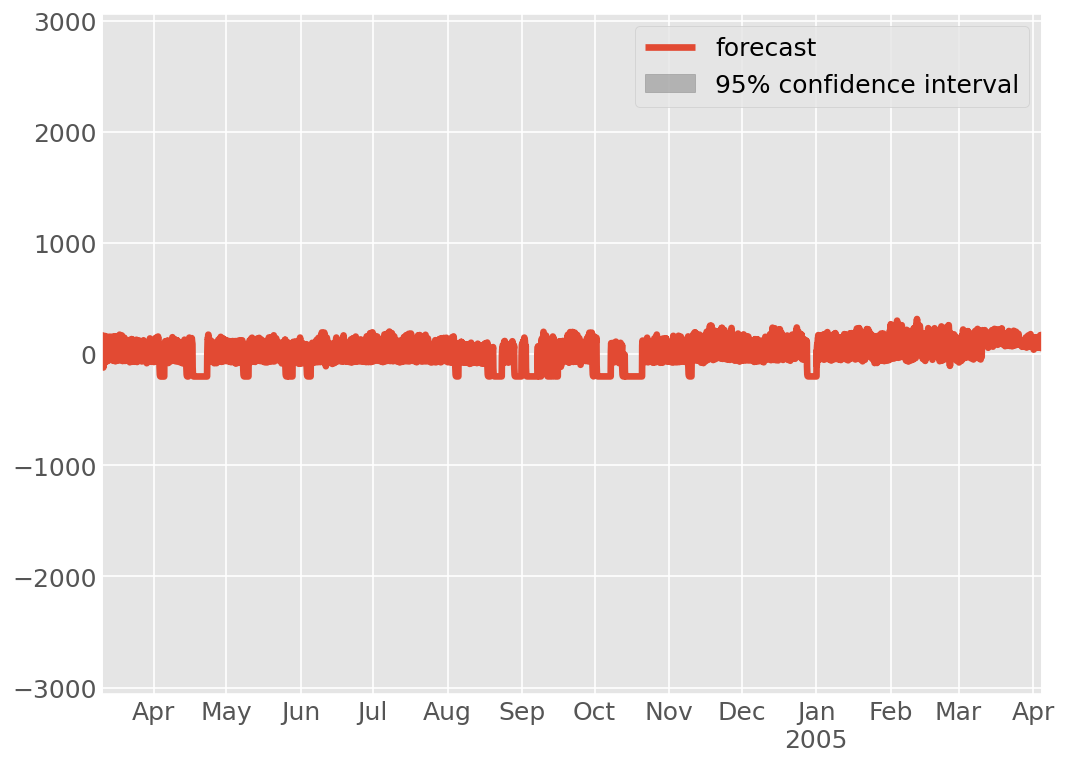

In [37]:
# Actual vs Fitted

from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model_fit, dynamic = False)
plt.show()


# Types of Time Series Data

What is date_range and how is it useful?



date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [16]:
# Creating a datetimeindex with daily frequency
daterange1 = pd.date_range(start='2004-03-10', end='2004-04-10')
daterange1

DatetimeIndex(['2004-03-10', '2004-03-11', '2004-03-12', '2004-03-13',
               '2004-03-14', '2004-03-15', '2004-03-16', '2004-03-17',
               '2004-03-18', '2004-03-19', '2004-03-20', '2004-03-21',
               '2004-03-22', '2004-03-23', '2004-03-24', '2004-03-25',
               '2004-03-26', '2004-03-27', '2004-03-28', '2004-03-29',
               '2004-03-30', '2004-03-31', '2004-04-01', '2004-04-02',
               '2004-04-03', '2004-04-04', '2004-04-05', '2004-04-06',
               '2004-04-07', '2004-04-08', '2004-04-09', '2004-04-10'],
              dtype='datetime64[ns]', freq='D')

In [17]:
# Creating a datetimeindex with monthly frequency
daterange2 = pd.date_range(start='2004-03-10', end='2004-04-10', freq='M')
daterange2

DatetimeIndex(['2004-03-31'], dtype='datetime64[ns]', freq='M')

In [18]:
# Creating a datetimeindex without specifying start date and using periods
daterange3 = pd.date_range(end='2004-03-10', periods=10)
daterange3

DatetimeIndex(['2004-03-01', '2004-03-02', '2004-03-03', '2004-03-04',
               '2004-03-05', '2004-03-06', '2004-03-07', '2004-03-08',
               '2004-03-09', '2004-03-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# Creating a datetimeindex specifying start date , end date and periods
daterange4 = pd.date_range(start='2004-03-10', end='2004-04-10', periods=5)
daterange4

DatetimeIndex(['2004-03-10 00:00:00', '2004-03-17 18:00:00',
               '2004-03-25 12:00:00', '2004-04-02 06:00:00',
               '2004-04-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Shifting and lags


We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

In [20]:
df["NO2(GT)"]

DateTime
2004-03-10 18:00:00    113.0
2004-03-10 19:00:00     92.0
2004-03-10 20:00:00    114.0
2004-03-10 21:00:00    122.0
2004-03-10 22:00:00    116.0
                       ...  
2005-04-04 10:00:00    189.8
2005-04-04 11:00:00    179.2
2005-04-04 12:00:00    174.7
2005-04-04 13:00:00    155.7
2005-04-04 14:00:00    167.7
Name: NO2(GT), Length: 9357, dtype: float64

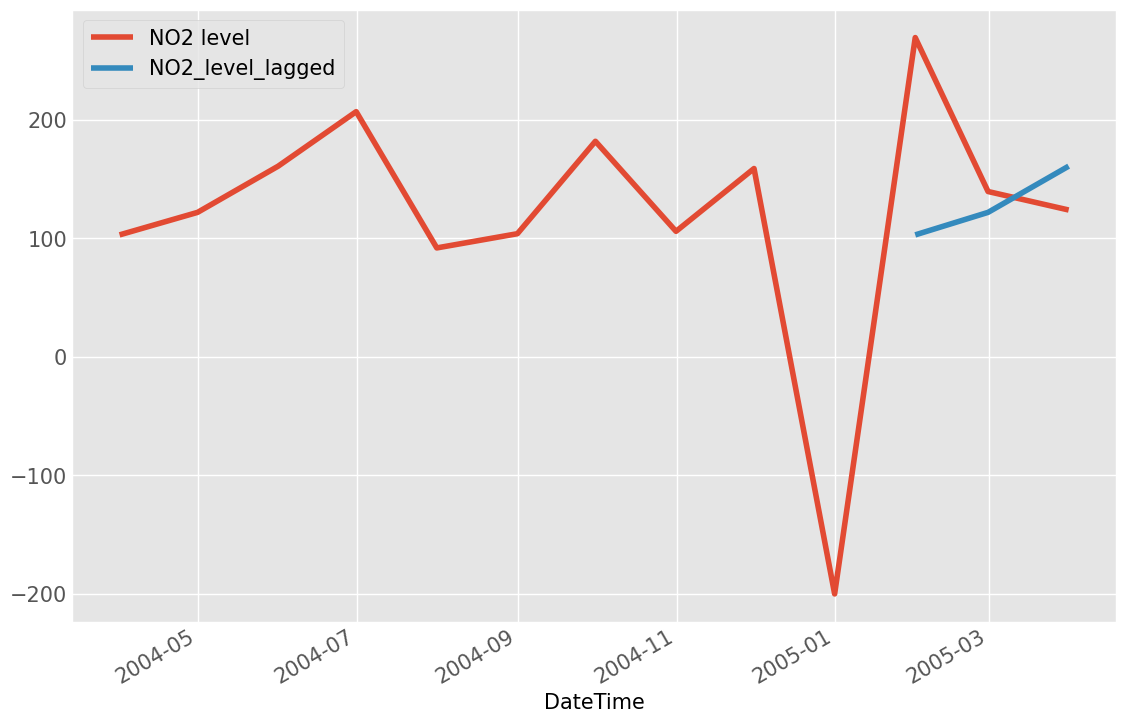

In [21]:
df["NO2(GT)"].asfreq('M').plot(legend=True)
df["NO2(GT)"].asfreq('M').shift(10).plot(legend=True)
plt.legend(['NO2 level', 'NO2_level_lagged'])
plt.show()

In [26]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [27]:
df.shape

(9357, 23)

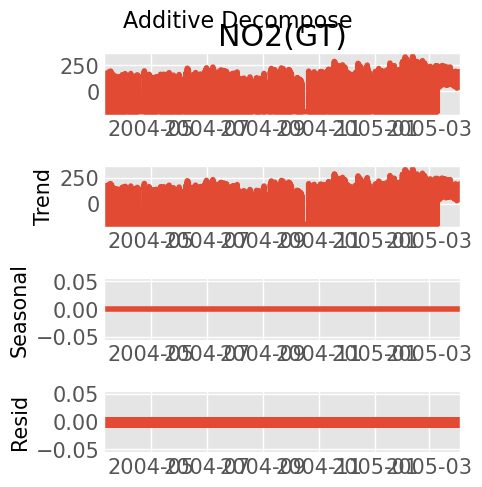

In [29]:
result_add = seasonal_decompose(x=df['NO2(GT)'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

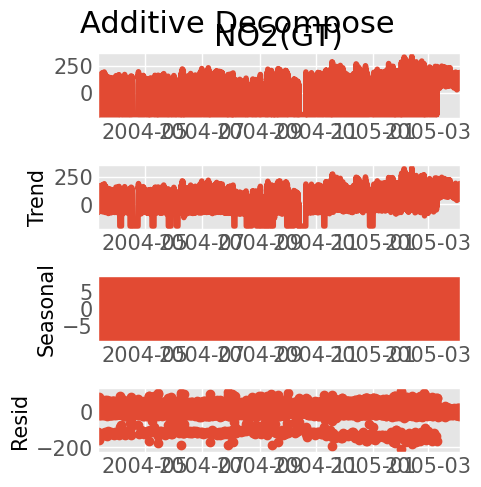

In [30]:
result_add = seasonal_decompose(x=df['NO2(GT)'], model='additive', extrapolate_trend='freq', period=2)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

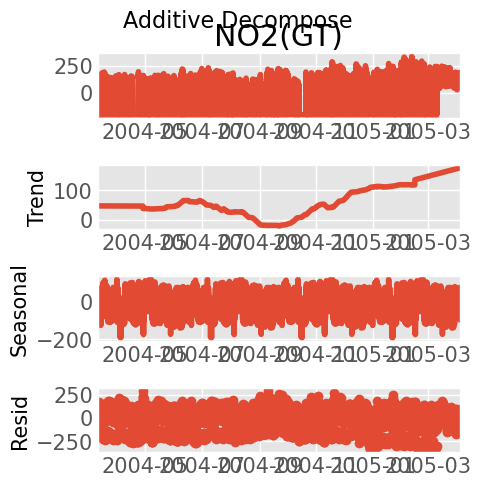

In [31]:
result_add = seasonal_decompose(x=df['NO2(GT)'], model='additive', extrapolate_trend='freq', period=int(len(df)/4))
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()
#Period = 4

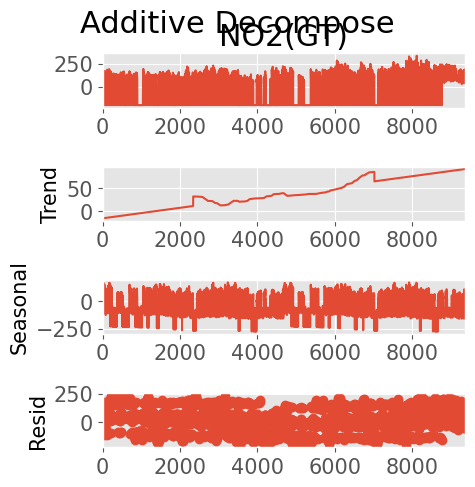

In [42]:
result_add = seasonal_decompose(x=df['NO2(GT)'], model='additive', extrapolate_trend='freq', period=int(len(df)/2))
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()
#Period = 8

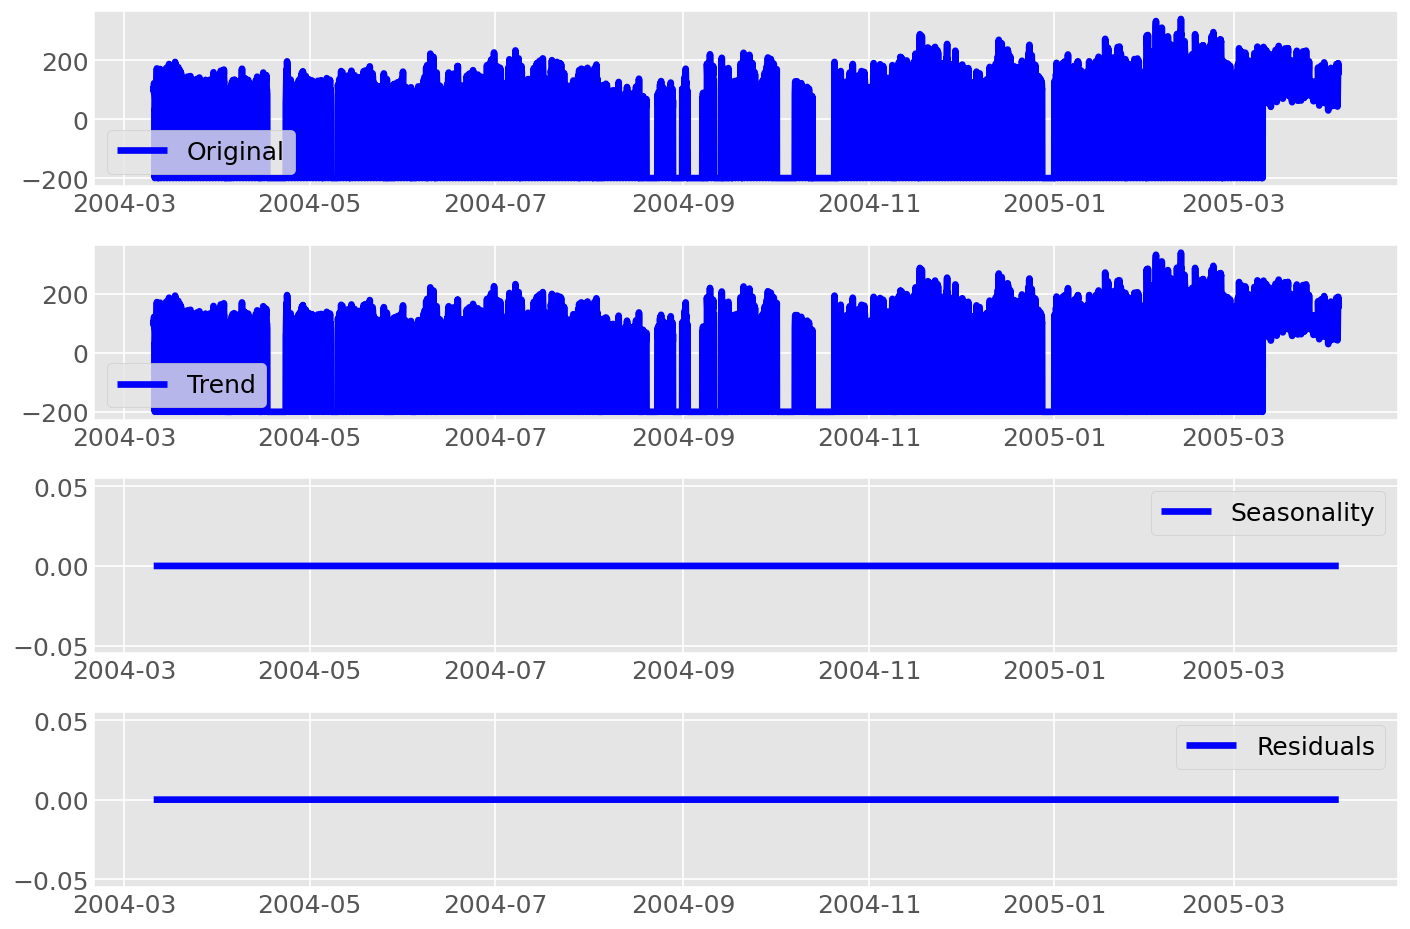

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['NO2(GT)'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()


The plotted graphs will show you the original data, the trend component, the seasonal component, and the residuals (noise), respectively.

Remember that understanding the seasonality of a time series can help you improve the accuracy of your forecasts. For example, if you know that your sales data has a seasonal component, you can account for this in your sales forecast model and make more accurate predictions.

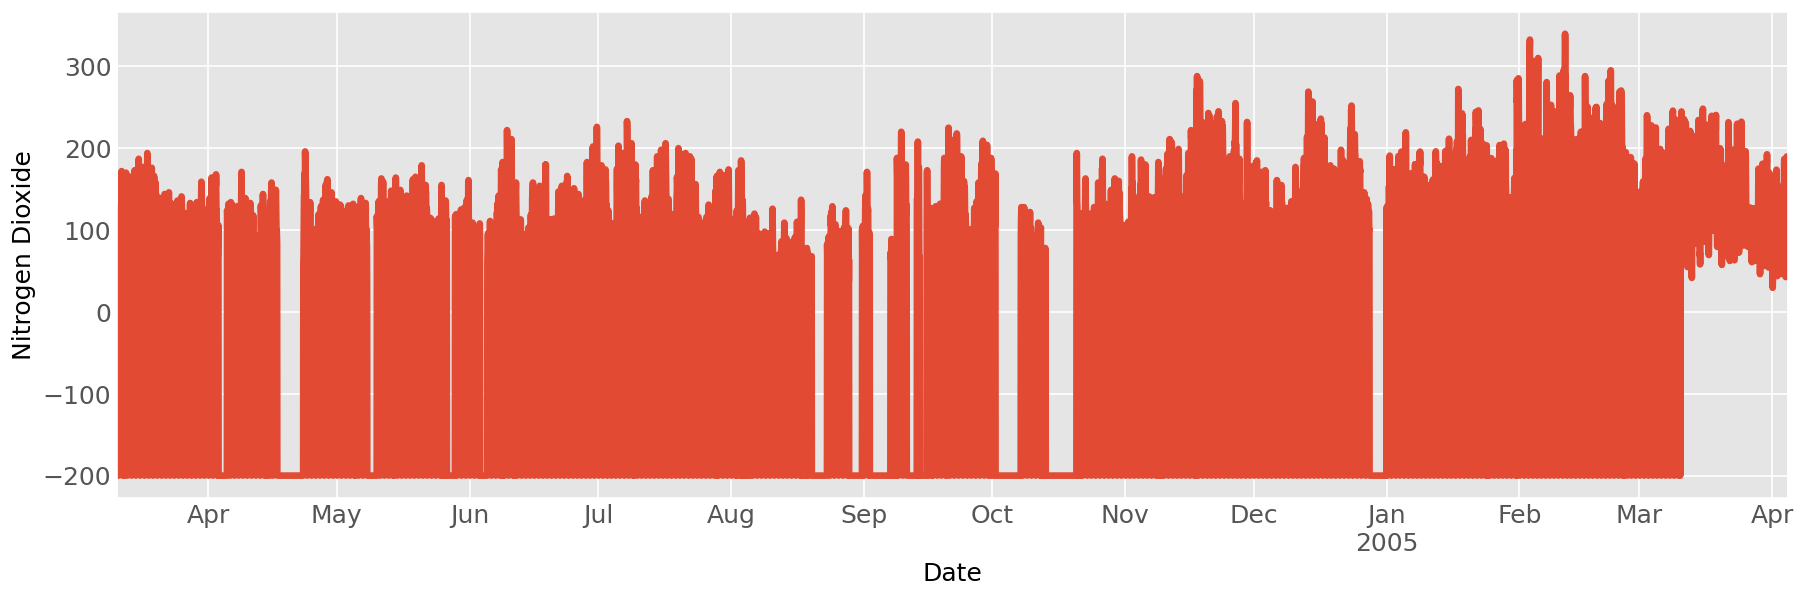

In [39]:
df["NO2(GT)"].plot(figsize=(16, 5), fontsize=15)
plt.xlabel("Date")
plt.ylabel("Nitrogen Dioxide");

In [42]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'hour', 'dayofweek', 'quarter', 'month',
       'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

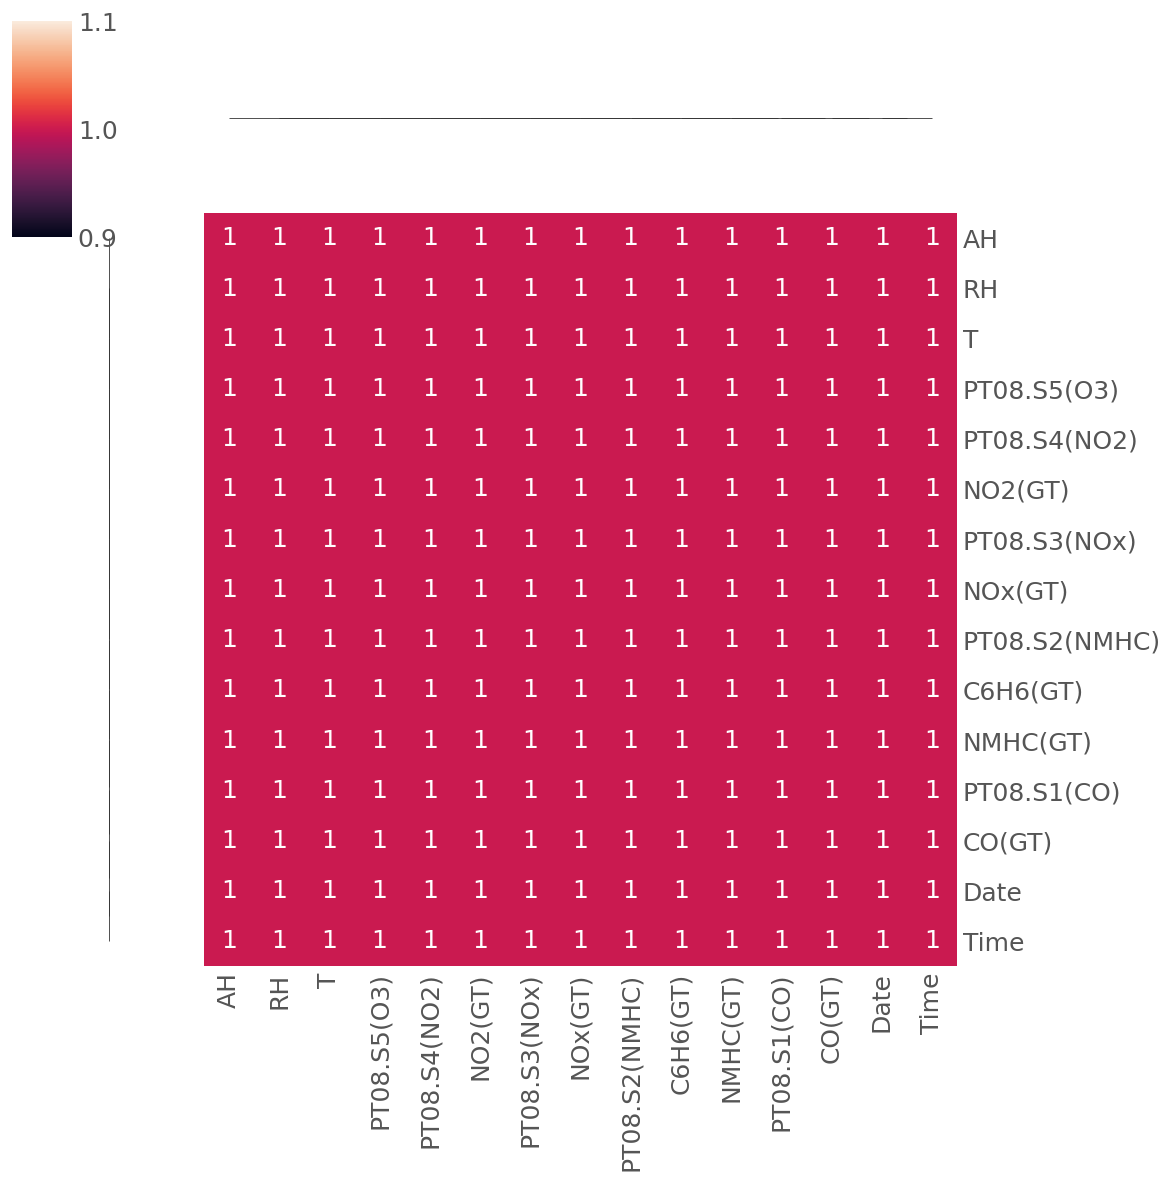

In [40]:
seasonality_dict = {
    ts: seasonal_decompose(x=df['NO2(GT)'], model='additive', extrapolate_trend='freq', period=4).seasonal for ts in df.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True)
plt.show();

# Stationarity and Non-Stationarity

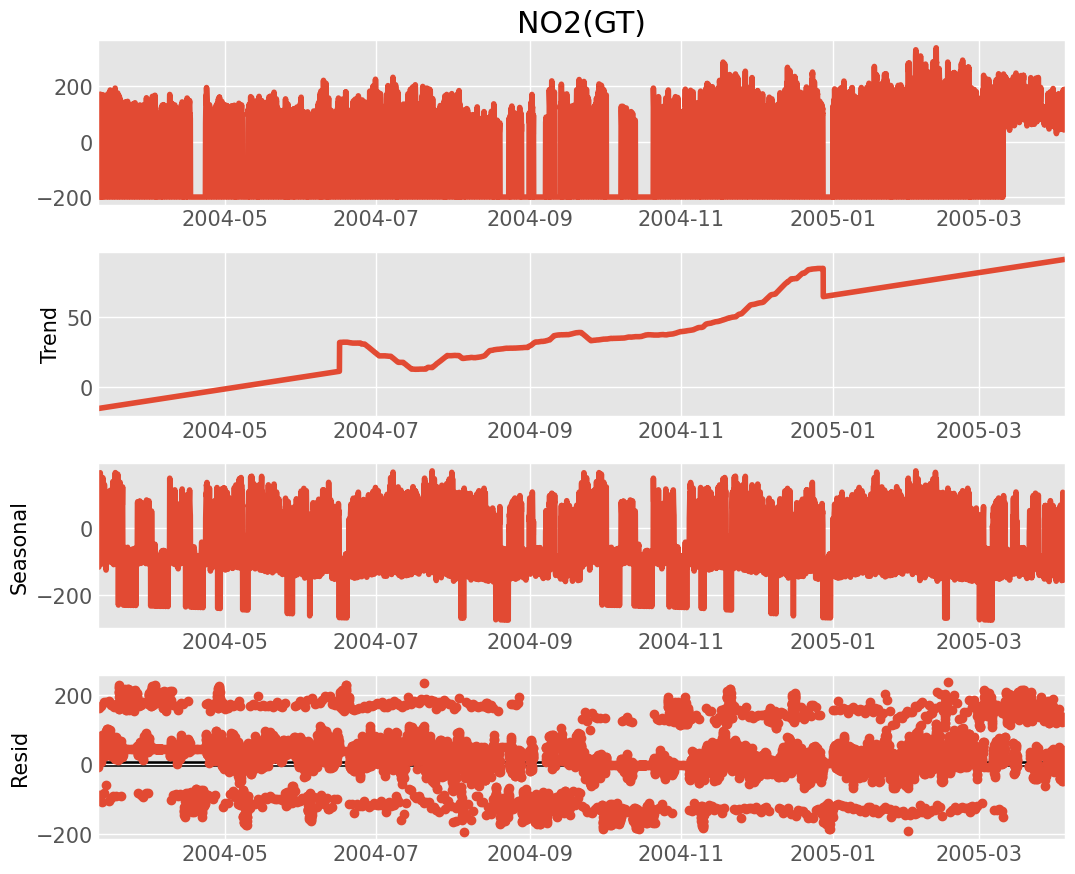

In [37]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
result_add = sm.tsa.seasonal_decompose(df["NO2(GT)"],model='additive', extrapolate_trend='freq', period=int(len(df)/2)) # The frequncy is annual
figure = result_add.plot()
plt.show()

<Axes: xlabel='DateTime'>

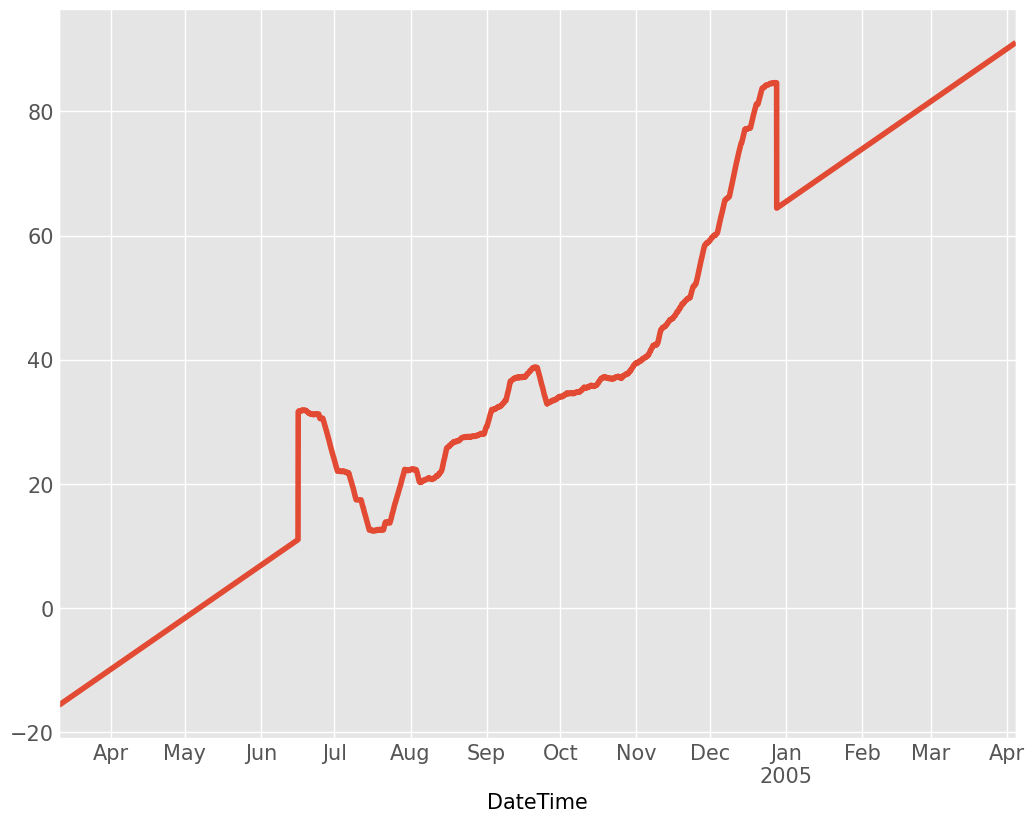

In [38]:
# The original non-stationary plot
result_add.trend.plot()

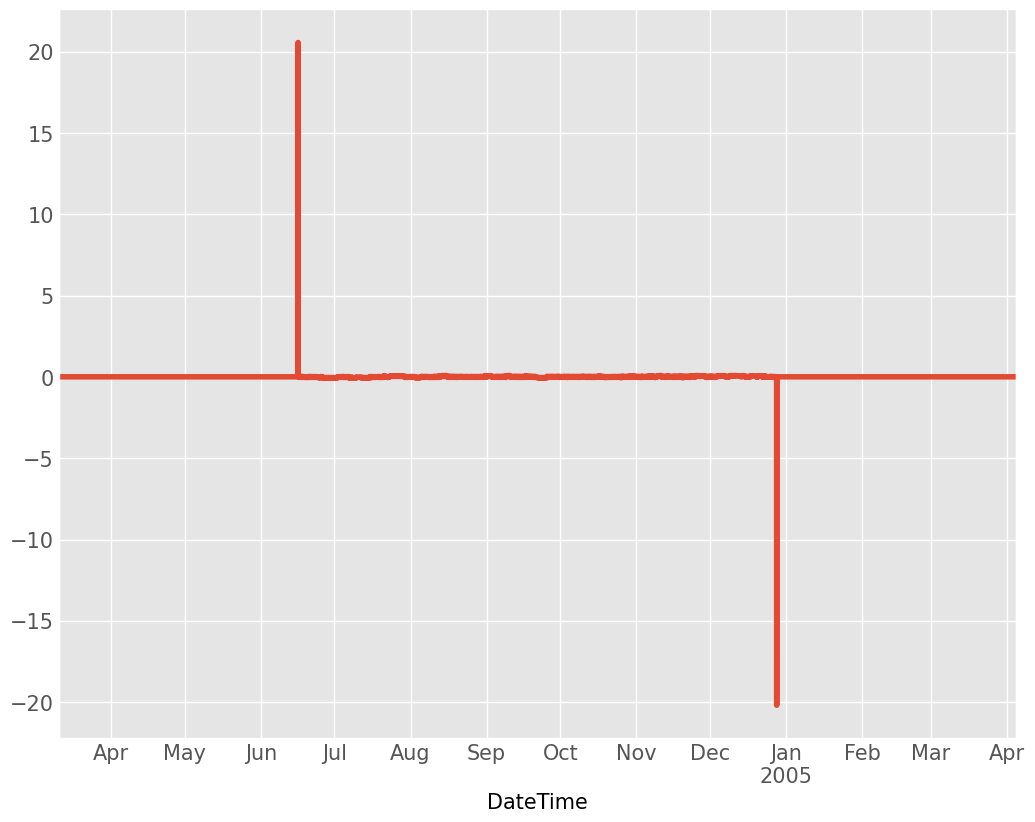

In [39]:
# The new stationary plot
result_add.trend.diff().plot();